# Pandas Basics — Part 2

_I adapted this notebook from Melanie Walsh's [Pandas Basics — Part 2](https://melaniewalsh.github.io/Intro-Cultural-Analytics/features/Data-Analysis/Pandas-Basics-Part2.html), which is from her online textbook [Introduction to Cultural Analytics & Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/features/welcome.html)_

In this lesson, we're going to introduce some more fundamentals of [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will review skills learned from the last lesson and introduce how to:

* Broadly examine data
* Work with missing data
* Rename, drop, and add new columns
* Perform mathematical calculations
* Aggregate subsets of data
* Make a simple time series

## Dataset
### The Trans-Atlantic Slave Trade Database

```{epigraph}
[D]isplaying data alone could not and did not offer the atonement descendants of slaves
sought or capture the inhumanity of this archive’s formation.
```
-- Jessica Marie Johnson, <a href="https://read.dukeupress.edu/social-text/article/36/4%20(137)/57/137032/Markup-BodiesBlack-Life-Studies-and-Slavery-Death">“Markup Bodies”</a>

The dataset that we're going to be working with in this lesson is taken from [The Trans-Atlantic Slave Trade Database](https://www.slavevoyages.org/voyage/database), part of the [*Slave Voyages* project](https://www.slavevoyages.org/). The larger database includes information about 35,000 slave-trading voyages from 1514-1866. The dataset we're working with here was filtered to include the 13,000 voyages that landed in the Americas. The data was filtered to also include the percentage of enslaved men, women, and children on the voyages.

We're working with this data for a number of reasons. The *Slave Voyages* project is a major data-driven contribution to the history of slavery and to the field of the digital humanities. Before the Trans-Atlantic Slave Trade Database, as DH scholar Jessica Johnson [writes,](https://read.dukeupress.edu/social-text/article-abstract/36/4%20(137)/57/137032/Markup-BodiesBlack-Life-Studies-and-Slavery-Death?redirectedFrom=fulltext) "historians assumed enslaved women and children played a negligible role in the slave trade." But evidence from the Trans-Atlantic Slave Trade Database suggested otherwise. "The existence of the Trans-Atlantic Slave Trade Database immediately reshaped debates about numbers of women and children exported from the continent," Johnson says, "influencing work on women in the slave trade on the African coast, slavery in African societies, and women in the slave trade to the Americas."

Though the Trans-Atlantic Slave Trade Database helped shed new light on the roles of enslaved women and children, Johnson makes clear that it was not computation or data alone that shed this light: 
> [D]isplaying data alone could not and did not offer the atonement descendants of slaves sought or capture the inhumanity of this archive’s formation. Culling the lives of women and children from the data set required approaching the data with intention. It required a methodology attuned to black life and to dismantling the methods used to create the manifests in the first place, then designing and launching an interface responsive to the desire of descendants of slaves for reparation and redress.

In this spirit, we want to think about how responsible data analysis requires more than just data and technical tools like pandas. It requires approaching data with intention and developing methodologies geared toward justice. This is especially necessary when dealing with data that records and perpetrates violence like the Trans-Atlantic Slave Trade Database.

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [70]:
import pandas as pd

The above `import` statement not only imports the pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

## Set Display Settings

By default, pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [71]:
pd.options.display.max_rows = 100

## Read in CSV File

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [72]:
slave_voyages_df = pd.read_csv('../docs/Trans-Atlantic-Slave-Trade_Americas.csv', delimiter=",", encoding='utf-8')

This creates a pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

When reading in the CSV file, we also specified the `encoding` and `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`/t`) or, more rarely, another character.

## Display Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

`NaN` is the Pandas value for any missing data. See ["Working with missing data"](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan) for more information

In [73]:
slave_voyages_df

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Mortality rate,Captain's name,Resistance label
0,1,Pastora de Lima,NaN,Rio de Janeiro,Mozambique,"Bahia, port unspecified",NaN,1817,290.0,NaN,NaN,NaN,0.28,"Dias, Manoel José",NaN
1,2,Tibério,NaN,"Bahia, port unspecified",Mozambique,"Bahia, port unspecified",NaN,1817,223.0,NaN,NaN,NaN,NaN,"Mata, José Maria da",NaN
2,3,Paquete Real,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,350.0,NaN,NaN,NaN,0.14,"Ferreira, José dos Santos",NaN
3,4,Bom Caminho,NaN,"Bahia, port unspecified",Quilimane,"Bahia, port unspecified",NaN,1817,342.0,NaN,NaN,NaN,0.10,"Dias, Domingos Francisco",NaN
4,5,Benigretta,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,516.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,900232,Tourville,NaN,Rio de Janeiro,"West Central Africa and St. Helena, port unspe...",Rio de Janeiro,NaN,1848,NaN,NaN,NaN,NaN,NaN,Alex,NaN
13358,900233,General Rêgo,NaN,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,NaN,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13359,900234,Duas Clementinas,NaN,Rio de Janeiro,Benguela,Rio de Janeiro,NaN,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13360,900236,Rio Tâmega,NaN,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,NaN,1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a few important things to note about the DataFrame displayed here:

* Index
    * The ascending numbers in the very left-hand column of the DataFrame is called the pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter pandas' default display settings yet again.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (13,362 x 15 columns).

## Display First *n* Rows

To look at the first *n* rows in a DataFrame, we can use a method called `.head()`.

In [74]:
slave_voyages_df.head(10)

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Mortality rate,Captain's name,Resistance label
0,1,Pastora de Lima,NaN,Rio de Janeiro,Mozambique,"Bahia, port unspecified",NaN,1817,290.0,NaN,NaN,NaN,0.280000,"Dias, Manoel José",NaN
1,2,Tibério,NaN,"Bahia, port unspecified",Mozambique,"Bahia, port unspecified",NaN,1817,223.0,NaN,NaN,NaN,NaN,"Mata, José Maria da",NaN
2,3,Paquete Real,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,350.0,NaN,NaN,NaN,0.140000,"Ferreira, José dos Santos",NaN
3,4,Bom Caminho,NaN,"Bahia, port unspecified",Quilimane,"Bahia, port unspecified",NaN,1817,342.0,NaN,NaN,NaN,0.100000,"Dias, Domingos Francisco",NaN
4,5,Benigretta,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,516.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Voador,NaN,"Bahia, port unspecified",Mozambique,"Bahia, port unspecified",NaN,1817,515.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Formiga,NaN,"Bahia, port unspecified",Malembo,"Bahia, port unspecified",NaN,1817,204.0,NaN,NaN,NaN,NaN,"Viana, Isidoro Antônio",NaN
7,8,Vigilante Africano,NaN,"Pernambuco, port unspecified",Luanda,"Bahia, port unspecified",NaN,1817,374.0,NaN,NaN,NaN,NaN,"Amorim, José Gomes de",NaN
8,9,Constante,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,345.0,NaN,NaN,NaN,0.060000,"Narciso, Antônio",NaN
9,10,Comerciante,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,478.0,NaN,NaN,NaN,0.006237,"Braga, Isidoro Martins",NaN


## Examine Data

### Shape

To explicitly check for how many rows vs columns make up a dataset, we can use the `.shape` method.

In [75]:
slave_voyages_df.shape

(13362, 15)

There are 13,362 rows and 15 columns.

### Data Types

Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

In [76]:
slave_voyages_df.dtypes

Voyage ID                                                                              int64
Vessel name                                                                           object
Voyage ship place where vessel registered                                             object
Voyage itinerary imputed port where began (ptdepimp) place                            object
Voyage itinerary imputed principal place of slave purchase (mjbyptimp)                object
Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place     object
Total embarked                                                                       float64
Year of arrival at port of disembarkation                                              int64
Slaves arrived at 1st port                                                           float64
Percent men                                                                          float64
Percent women                                                         

It's important to always check the data types in your DataFrame. For example, sometimes numeric values will accidentally be interpreted as a string object. To perform calculations on this data, you would need to first convert that column from a string to an integer.

### Columns

We can also check the column names of the DataFrame with [`.columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)

In [77]:
slave_voyages_df.columns

Index(['Voyage ID', 'Vessel name',
       'Voyage ship place where vessel registered ',
       'Voyage itinerary imputed port where began (ptdepimp) place',
       'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ',
       'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place',
       'Total embarked', 'Year of arrival at port of disembarkation',
       'Slaves arrived at 1st port', 'Percent men', 'Percent women',
       'Percent children', 'Mortality rate', 'Captain's name',
       'Resistance label'],
      dtype='object')

### Summary Statistics

In [78]:
slave_voyages_df.describe(include='all')

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Mortality rate,Captain's name,Resistance label
count,13362.000000,13362,1549,12128,13352,13362,3678.000000,13362.000000,6661.000000,279.000000,279.000000,1012.000000,2987.000000,11505,50
unique,NaN,3942,69,117,101,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6941,4
top,NaN,,Seville,"Bahia, port unspecified",Luanda,"Bahia, port unspecified",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Garcia, Francisco Correa",Slave insurrection
freq,NaN,498,247,4198,3364,4223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,40
mean,44871.176471,NaN,NaN,NaN,NaN,NaN,372.005438,1760.491992,304.559676,0.517071,0.249570,0.104174,0.105789,NaN,NaN
std,101638.467895,NaN,NaN,NaN,NaN,NaN,178.984963,69.993700,173.915462,0.196595,0.137858,0.140982,0.130436,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1542.000000,1.000000,0.011900,0.000000,0.000000,0.000000,NaN,NaN
25%,8968.250000,NaN,NaN,NaN,NaN,NaN,239.000000,1726.000000,164.000000,0.379585,0.169155,0.015214,0.020000,NaN,NaN
50%,40558.000000,NaN,NaN,NaN,NaN,NaN,377.000000,1777.000000,290.000000,0.490800,0.243900,0.042140,0.060000,NaN,NaN
75%,49470.750000,NaN,NaN,NaN,NaN,NaN,497.000000,1815.000000,418.000000,0.621625,0.323570,0.143135,0.130000,NaN,NaN


## Missing Data

```{epigraph}
The conceit of the archive is that it is the repository of answers, of knowable conclusions, of the data needed to explain or understand the past.

The reality, however, is that the archive is the troubled genesis of our always-failed effort to unravel the effects of the past on the present; rather than verifiable truths, the archive — and its silences — house the very questions that unsettle us.
```
-- Jennifer Morgan, ["Accounting for 'The Most Excruciating Torment'"](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF)


Responsible data analysis requires understanding missing data. The Trans-Atlantic Slave Trade Database, as historian Jennifer Morgan [writes](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF), contains innumerable "silences" and "gaps." These silences include the thoughts, feelings, and experiences of the enslaved African people on board the voyages — silences that cannot be found in the database itself.

There are other kinds of silences and gaps that can be detected in the database itself, however. For example, while some of the voyages in the the Trans-Atlantic Slave Trade Database recorded information about how many enslaved women and children were aboard, most did not. Yet focusing on the data that is there and analyzing trends in the missing data can help shed light on the history of gender and enslavement. The fact that most ship captains did not record gender information, Morgan argues, helps tells us about their "priorities": "[W]e can assume that had it been financially significant to have more men than women that data would have been more scrupulously recorded."

### .isna() / .notna()

Pandas has special ways of dealing with missing data. As you may have already noticed, blank rows in a CSV file show up as `NaN` in a Pandas DataFrame.

To filter and count the number of missing/not missing values in a dataset, we can use the special `.isna()` and `.notna()` methods on a DataFrame or Series object.

In [79]:
slave_voyages_df['Percent women'].notna()

0        False
1        False
2        False
3        False
4        False
         ...  
13357    False
13358    False
13359    False
13360    False
13361    False
Name: Percent women, Length: 13362, dtype: bool

The `.isna()` and `.notna()` methods return True/False pairs for each row, which we can use to filter the DataFrame for any rows that have information in a given column. For example, we can filter the DataFrame for only rows that have information about the percentage of enslaved women aboard the voyage.

In [80]:
slave_voyages_df[slave_voyages_df['Percent women'].notna()]

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Mortality rate,Captain's name,Resistance label
414,506,Vulcano,NaN,Rio de Janeiro,Quilimane,Rio de Janeiro,568.0,1825,504.0,0.35305,0.12595,0.52099,0.11,"Ferreira, Antônio José",NaN
967,1328,Duquesa de Bragança,NaN,Rio de Janeiro,Luanda,Rio de Janeiro,NaN,1834,275.0,0.17818,0.01091,0.81091,NaN,"Barros, José Joaquim de<br/> Martinez, Antônio...",NaN
969,1330,S Antônio,NaN,Rio de Janeiro,Gabon,Rio de Janeiro,160.0,1834,91.0,0.15385,0.06593,0.78022,0.43,"Vieira, Hipólito José",NaN
975,1420,Rio de la Plata,NaN,Montevideo,"West Central Africa and St. Helena, port unspe...",Rio de Janeiro,550.0,1834,521.0,0.18489,0.07555,0.73956,0.18,"Silva, Antônio Cardoso da",NaN
981,1426,Órion,NaN,Rio de Janeiro,Luanda,Rio de Janeiro,NaN,1835,245.0,0.23265,0.08163,0.68571,NaN,"Silveira, Teotônio Flávio da",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,96026,Susan,NaN,NaN,Gambia,Buenos Aires,150.0,1803,90.0,0.18889,0.03333,0.77778,0.40,"Palmes, Eduardo",NaN
13084,96040,Príncipe Regente,NaN,Setubal,Saint-Louis,Montevideo,107.0,1804,80.0,0.60417,0.12500,0.27083,0.25,"Paula Rodríguez, Francisco de Paula",NaN
13105,96073,Marques de Flori,NaN,NaN,Mauritius (Ile de France),Montevideo,NaN,1782,40.0,0.85000,0.15000,0.00000,NaN,"Moulin, François",NaN
13117,96085,Catalina,NaN,NaN,"Africa., port unspecified",Buenos Aires,NaN,1802,237.0,0.77637,0.21941,0.00422,NaN,NaN,NaN


The data is now filtered to only include the 279 rows with information about how many women were aboard the voyage.

To explicitly count the number of blank rows, we can use the `.value_counts()` method.

In [81]:
slave_voyages_df['Percent women'].isna().value_counts()

True     13083
False      279
Name: Percent women, dtype: int64

There are 13,083 that do not contain information about the number of enslaved women on the voyage (`isna` = True) and 279 rows that do contain this information (`isna` = False).

To quickly transform these numbers into percentages, we can set the `normalize=` parameter to True.

In [82]:
slave_voyages_df['Percent women'].isna().value_counts(normalize=True)

True     0.97912
False    0.02088
Name: Percent women, dtype: float64

About 2% of rows in this dataset have information about the number of enslaved women on the voyage while 98% do not.

### .count()

Because the `.count()` method always excludes NaN values, we can also count the number of values in each column and divide by the total number of rows in each column (`len()`) to find the percentage of not blank data in every column.

In [83]:
slave_voyages_df.count() / len(slave_voyages_df)

Voyage ID                                                                            1.000000
Vessel name                                                                          1.000000
Voyage ship place where vessel registered                                            0.115926
Voyage itinerary imputed port where began (ptdepimp) place                           0.907649
Voyage itinerary imputed principal place of slave purchase (mjbyptimp)               0.999252
Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place    1.000000
Total embarked                                                                       0.275258
Year of arrival at port of disembarkation                                            1.000000
Slaves arrived at 1st port                                                           0.498503
Percent men                                                                          0.020880
Percent women                                               

For example, 100% of the rows in the columns "year_of_arrival" contain information, while .3% of the rows in the column "Resistance label" contain information. The "Resistance label" indicates whether there is a record of the enslaved Africans aboard the voyage staging some form of resistance.

### .fillna()

If we wanted, we could fill the `NaN` values in the DataFrame with a different value by using the `.fillna()` method.

In [84]:
slave_voyages_df['Percent women'].fillna('no gender information recorded')

0        no gender information recorded
1        no gender information recorded
2        no gender information recorded
3        no gender information recorded
4        no gender information recorded
                      ...              
13357    no gender information recorded
13358    no gender information recorded
13359    no gender information recorded
13360    no gender information recorded
13361    no gender information recorded
Name: Percent women, Length: 13362, dtype: object

## Rename Columns

We can rename columns with the [`.rename()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) and the `columns=` parameter. For example, we can rename the "Resistance label" column "African resistance"

In [85]:
slave_voyages_df.rename(columns={'Resistance label': 'African resistance'})

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Mortality rate,Captain's name,African resistance
0,1,Pastora de Lima,NaN,Rio de Janeiro,Mozambique,"Bahia, port unspecified",NaN,1817,290.0,NaN,NaN,NaN,0.28,"Dias, Manoel José",NaN
1,2,Tibério,NaN,"Bahia, port unspecified",Mozambique,"Bahia, port unspecified",NaN,1817,223.0,NaN,NaN,NaN,NaN,"Mata, José Maria da",NaN
2,3,Paquete Real,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,350.0,NaN,NaN,NaN,0.14,"Ferreira, José dos Santos",NaN
3,4,Bom Caminho,NaN,"Bahia, port unspecified",Quilimane,"Bahia, port unspecified",NaN,1817,342.0,NaN,NaN,NaN,0.10,"Dias, Domingos Francisco",NaN
4,5,Benigretta,NaN,"Bahia, port unspecified",Cabinda,"Bahia, port unspecified",NaN,1817,516.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,900232,Tourville,NaN,Rio de Janeiro,"West Central Africa and St. Helena, port unspe...",Rio de Janeiro,NaN,1848,NaN,NaN,NaN,NaN,NaN,Alex,NaN
13358,900233,General Rêgo,NaN,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,NaN,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13359,900234,Duas Clementinas,NaN,Rio de Janeiro,Benguela,Rio de Janeiro,NaN,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13360,900236,Rio Tâmega,NaN,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,NaN,1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Renaming the "Resistance label" column as above will only momentarily change that column's name, however. If we display our DataFrame, we will see that the column name has *not* changed permamently.

In [86]:
slave_voyages_df.head(1)

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Mortality rate,Captain's name,Resistance label
0,1,Pastora de Lima,NaN,Rio de Janeiro,Mozambique,"Bahia, port unspecified",NaN,1817,290.0,NaN,NaN,NaN,0.28,"Dias, Manoel José",NaN


To save changes in the DataFrame, we need to reassign the DataFrame to the same variable.

In [87]:
slave_voyages_df = slave_voyages_df.rename(columns={'Resistance label': 'African resistance'})

In [88]:
slave_voyages_df.head(1)

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Mortality rate,Captain's name,African resistance
0,1,Pastora de Lima,NaN,Rio de Janeiro,Mozambique,"Bahia, port unspecified",NaN,1817,290.0,NaN,NaN,NaN,0.28,"Dias, Manoel José",NaN


## Drop Columns

We can remove a column from the DataFrame with the `.drop()` method and the column name.

In [89]:
slave_voyages_df = slave_voyages_df.drop(columns="Mortality rate")

In [90]:
slave_voyages_df.columns

Index(['Voyage ID', 'Vessel name',
       'Voyage ship place where vessel registered ',
       'Voyage itinerary imputed port where began (ptdepimp) place',
       'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ',
       'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place',
       'Total embarked', 'Year of arrival at port of disembarkation',
       'Slaves arrived at 1st port', 'Percent men', 'Percent women',
       'Percent children', 'Captain's name', 'African resistance'],
      dtype='object')

## Add Columns

To add a column, we simply put a new column name in square brackets and set it equal to whatever we want the new column to be.

For example, if we wanted to create new columns for the total women and men aboard each voyage, we could set them equal to the product of the "total_disembarked" column * the "percent_women" / "percent_men" columns.

In [91]:
slave_voyages_df['Total women'] = slave_voyages_df['Total embarked'] * slave_voyages_df['Percent women']

In [92]:
slave_voyages_df['Total men'] = slave_voyages_df['Total embarked'] * slave_voyages_df['Percent men']

If we scroll all the way to the right side of the DataFrame, we can see that these columns have been added.

In [93]:
slave_voyages_df.head(1)

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Captain's name,African resistance,Total women,Total men
0,1,Pastora de Lima,NaN,Rio de Janeiro,Mozambique,"Bahia, port unspecified",NaN,1817,290.0,NaN,NaN,NaN,"Dias, Manoel José",NaN,NaN,NaN


## Sort Columns

We can sort a DataFrame with the `.sort_values()` method, inside of which we include the parameter `by=` and indicate the name of the column we want to sort by (written in quotation marks).

For example, we can sort the DataFrame by the voyages that had the largest proportion of enslaved women aboard.

In [94]:
slave_voyages_df.sort_values(by='Percent women', ascending=False)

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Captain's name,African resistance,Total women,Total men
3584,11330,Prinses,NaN,"Pernambuco, port unspecified",Luanda,"Pernambuco, port unspecified",152.0,1642,NaN,0.01190,0.98810,0.44737,NaN,NaN,150.19120,1.80880
3580,11326,Overijsel,NaN,"Pernambuco, port unspecified",Luanda,"Pernambuco, port unspecified",78.0,1642,NaN,0.28889,0.71111,0.00000,"Langman, Claes Arentsen",NaN,55.46658,22.53342
13131,96099,S Ana,NaN,NaN,"Africa., port unspecified",Buenos Aires,160.0,1804,81.0,0.31667,0.63333,0.05000,"Amaro, Rodriguez de Oliveira",NaN,101.33280,50.66720
13022,92352,John and Betty,Liverpool,Liverpool,"Africa., port unspecified",Rappahannock,NaN,1727,140.0,0.39560,0.60440,0.35000,"Denton, William",NaN,NaN,NaN
4511,19620,NS das Necessidades,NaN,Lisbon,Cacheu,Maranhao,NaN,1770,177.0,0.26344,0.54839,0.18817,"Cabo, Manoel Luis do",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,900232,Tourville,NaN,Rio de Janeiro,"West Central Africa and St. Helena, port unspe...",Rio de Janeiro,NaN,1848,NaN,NaN,NaN,NaN,Alex,NaN,NaN,NaN
13358,900233,General Rêgo,NaN,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,NaN,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13359,900234,Duas Clementinas,NaN,Rio de Janeiro,Benguela,Rio de Janeiro,NaN,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13360,900236,Rio Tâmega,NaN,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,NaN,1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By default, pandas will sort in "ascending" order, from the smallest value to the largest value. If we want to sort the largest values first, we need to include another parameter `ascending=False`.

Because the DataFrame is truncated when it has more than 100 rows, we can use a Python list slice to view the top 30 (or any number less than 100) voyages with enslaved women aboard.

In [95]:
slave_voyages_df.sort_values(by='Percent women', ascending=False)[:30]

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Captain's name,African resistance,Total women,Total men
3584,11330,Prinses,NaN,"Pernambuco, port unspecified",Luanda,"Pernambuco, port unspecified",152.0,1642,NaN,0.011900,0.988100,0.447370,NaN,NaN,150.191200,1.808800
3580,11326,Overijsel,NaN,"Pernambuco, port unspecified",Luanda,"Pernambuco, port unspecified",78.0,1642,NaN,0.288890,0.711110,0.000000,"Langman, Claes Arentsen",NaN,55.466580,22.533420
13131,96099,S Ana,NaN,NaN,"Africa., port unspecified",Buenos Aires,160.0,1804,81.0,0.316670,0.633330,0.050000,"Amaro, Rodriguez de Oliveira",NaN,101.332800,50.667200
13022,92352,John and Betty,Liverpool,Liverpool,"Africa., port unspecified",Rappahannock,NaN,1727,140.0,0.395600,0.604400,0.350000,"Denton, William",NaN,NaN,NaN
4511,19620,NS das Necessidades,NaN,Lisbon,Cacheu,Maranhao,NaN,1770,177.0,0.263440,0.548390,0.188170,"Cabo, Manoel Luis do",NaN,NaN,NaN
3526,11265,Zwarte Arend,NaN,"Pernambuco, port unspecified",Calabar,"Pernambuco, port unspecified",318.0,1641,NaN,0.270140,0.545020,0.184830,"Cornelisz, Cornelis",Slave insurrection,173.316360,85.904520
3525,11264,Wapen van Delft,NaN,"Pernambuco, port unspecified",Calabar,"Pernambuco, port unspecified",NaN,1641,NaN,0.367150,0.531400,0.101450,"Danser, Simon den",NaN,NaN,NaN
3589,11335,Bruinvis,NaN,"Pernambuco, port unspecified",Luanda,"Pernambuco, port unspecified",350.0,1643,NaN,0.474180,0.525820,0.391430,"Bruininck, Jacob Claesz",NaN,184.037000,165.963000
3657,15064,Blossom,NaN,NaN,Cape Coast Castle,"Virginia, port unspecified",270.0,1679,244.0,0.462450,0.498020,0.039530,"Smith, William",NaN,134.465400,124.861500
4499,19608,S Francisco de Paula,NaN,Lisbon,Bissau,Maranhao,105.0,1781,146.0,0.314290,0.485710,0.200000,"Franco, João",NaN,50.999550,33.000450


If we want to sort a Series object, we don't need to use the `by=` paramter.

In [96]:
slave_voyages_df['Total women'].sort_values(ascending=False)

3561     235.00016
2096     219.90760
3589     184.03700
6051     178.52407
6068     174.37377
           ...    
13357          NaN
13358          NaN
13359          NaN
13360          NaN
13361          NaN
Name: Total women, Length: 13362, dtype: float64

## Calculate Columns

We can do different calculations on columns with built-in Pandas functions. These calculations will ignore `NaN` values.

| Pandas calculations | Explanation                         |
|----------|-------------------------------------|
| `.count()`    | Number of observations    |
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |



For example, to find the average proprotion of enslaved women aboard the voyages (for voyages that have this information), we can use the `.mean()` method.

In [97]:
slave_voyages_df['Percent women'].mean()

0.24957008591397853

There were on average 25% enslaved women aboard the voyages for voyages that recorded this information.

In [98]:
slave_voyages_df['Percent women'].max()

0.9881

The highest percentage of women aboard the slave voyages was 99%. We can use this calculation as a filter to identify the voyage(s) with this maximum value.

In [99]:
slave_voyages_df[slave_voyages_df['Percent women'] == slave_voyages_df['Percent women'].max()]

,Voyage ID,Vessel name,Voyage ship place where vessel registered,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Captain's name,African resistance,Total women,Total men
3584,11330,Prinses,NaN,"Pernambuco, port unspecified",Luanda,"Pernambuco, port unspecified",152.0,1642,NaN,0.0119,0.9881,0.44737,NaN,NaN,150.1912,1.8088


According to the Trans-Atlantic Slave Trade Database, the 1642 voyage of the Prinses had 99% enslaved women aboard.

As demonstrated previously, we can also perform calculations with columns themselves.

In [100]:
(slave_voyages_df['Total embarked'] * slave_voyages_df['Percent women']).max()

235.00016

## Groupby Columns

The Pandas function`.groupby()` allows us to group data and perform calculations on the groups.

For example, Jennifer Morgan writes about how some nations recorded more information about the gender of the enslaved people aboard their voyages than other nations did. To see the breakdown of gender information by nation, we can use a `.groupby()` function.

The first step to using groupby is to type the name of the DataFrame followed by `.groupby()` with the column we'd like to aggregate based on, such as "national_affiliation."

In [102]:
slave_voyages_df.groupby('Voyage ship place where vessel registered ')

This action will created a [GroupBy object](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). We can perform calculations on this grouped data, such as counting the number of non-blank values in each column for each nation.

In [103]:
slave_voyages_df.groupby('Voyage ship place where vessel registered ').count()

,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Total embarked,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Percent men,Percent women,Percent children,Captain's name,African resistance,Total women,Total men
Voyage ship place where vessel registered,,,,,,,,,,,,,,,
Angola (possibly New Calabar),1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
"Bahia, port unspecified",55,55,55,55,55,49,55,27,0,0,1,32,0,0,0
Baltimore,2,2,1,2,2,0,2,2,0,0,0,2,0,0,0
"Barbados, port unspecified",3,3,3,3,3,2,3,2,0,0,0,3,0,0,0
Boston,19,19,16,19,19,2,19,17,0,0,0,19,1,0,0
Bristol,178,178,178,178,178,10,178,160,2,2,17,177,2,0,0
Bristol (RI),43,43,43,43,43,42,43,38,3,3,3,43,0,3,3
"British Americas, port unspecified",12,12,12,12,12,0,12,12,0,0,6,12,0,0,0
Cadiz,8,8,5,8,8,1,8,7,1,1,1,8,0,1,1


On England's Slave Ship Records
> For example, patterns emerge that suggest that English slave ship captains provided the most data related to the age or sex characteristics of the captives they transported and sold into slavery...The degree to which the practice of recording the sex of the passengers on board accords to national origin raises some interesting questions about the possible correlations between certain notational and national presumptions of accountability.

-Jennifer Morgan, ["Accounting for 'The Most Excruciating Torment'"](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF)


We can also isolate only the "percent_women" column.

In [105]:
slave_voyages_df.groupby('Voyage ship place where vessel registered ').count()['Percent women']

Voyage ship place where vessel registered 
Angola (possibly New Calabar)          0
Bahia, port unspecified                0
Baltimore                              0
Barbados, port unspecified             0
Boston                                 0
Bristol                                2
Bristol (RI)                           3
British Americas, port unspecified     0
Cadiz                                  1
Canary Islands                         0
Cape Verde Islands                     0
Captured by WIC                        0
Carolinas                              0
Charleston                             1
Cork                                   0
Denmark, port unspecified              1
Dublin                                 0
England, port unspecified              1
Georgia, port unspecified              0
Glasgow                                0
Great Britain, port unspecified        0
Hamburg                                0
Hampton                                0
Hull          

In [106]:
slave_voyages_df.groupby('Voyage ship place where vessel registered ')['Percent women'].count().sort_values(ascending=False)

Voyage ship place where vessel registered 
Liverpool                             10
Newport                               10
London                                 6
Bristol (RI)                           3
Lancaster                              2
Bristol                                2
England, port unspecified              1
USA, location unspecified              1
Providence                             1
Cadiz                                  1
Philadelphia                           1
Denmark, port unspecified              1
Newport and Salem                      1
Charleston                             1
Hampton                                0
Hamburg                                0
Jamaica, port unspecified              0
Hull                                   0
Kingston (Mass.)                       0
La Coruna                              0
Lisbon                                 0
Great Britain, port unspecified        0
Williamsburg                           0
Glasgow       

> Line Breaks:
If a line of code gets too long, you can create a line break with a backslash `\`

In [107]:
slave_voyages_df.groupby('Voyage ship place where vessel registered ')['Percent women'].count()\
.sort_values(ascending=False).plot(kind='bar', title='Trans-Atlantic Slave Trade (Americas): \n Slave Voyages with Recorded Gender Information')

## Make Time Series with Groupby

To make a time series, we would typically want to convert our date column into datetime values rather than integers.

In [108]:
slave_voyages_df['Year of arrival at port of disembarkation'].dtype

dtype('int64')

Datetime values allow us to do special things that we can't do with regular integers and floats, such as extract just the year, month, week, day, or second from any date or aggregate based on any of the above.

Since we're only working with year information, however, we can make some simple time series plots just by grouping by the year column and performing calculations on those year groupings, such as calculating the average percentage of enslaved women aboard the voyages over time.

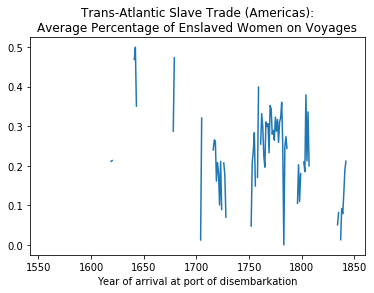

In [109]:
slave_voyages_df.groupby('Year of arrival at port of disembarkation')['Percent women'].mean()\
.plot(title="Trans-Atlantic Slave Trade (Americas):\nAverage Percentage of Enslaved Women on Voyages")

We can do the same thing with the total number of women, this time taking the sum for every year.

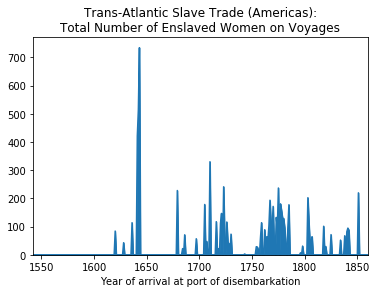

In [110]:
slave_voyages_df.groupby('Year of arrival at port of disembarkation')['Total women'].sum()\
.plot(kind='area', title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages")

We can plot multiple columns at the same time by using two square brackets. For example, we can compare the total number of women and men aboard the voyages.

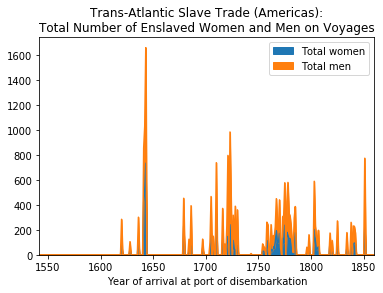

In [111]:
slave_voyages_df.groupby('Year of arrival at port of disembarkation')[['Total women', 'Total men']].sum()\
.plot(kind='area', title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women and Men on Voyages")

Finally, we can also add in the total number of enslaved people who embarked on the voyages, offering a perspective of how mcuh gender information we have about the voyages compared to the total number of voyages.

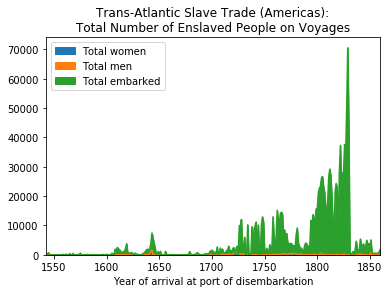

In [112]:
slave_voyages_df.groupby('Year of arrival at port of disembarkation')[['Total women', 'Total men', 'Total embarked']].sum()\
.plot(kind='area', title='Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved People on Voyages')